<a href="https://colab.research.google.com/github/rsandadi/MachineLearningModels/blob/master/Loan_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Getting Started**

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Loan.csv to Loan.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [ ]:
df = pd.read_csv("Loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Loan_Amount_Term    600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# find the null values
df.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [ ]:
# fill the missing values for numerical terms - mean
df['Loan_Amount'] = df['Loan_Amount'].fillna(df['Loan_Amount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## **Data Visualization of Categorical Features**

# **Univariate Analysis**

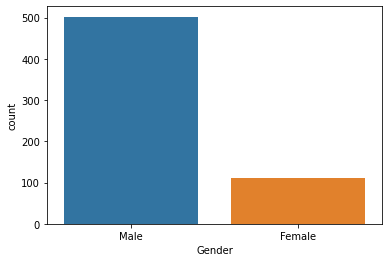

In [ ]:
# categorical attributes visualization
sns.countplot(df['Gender']);

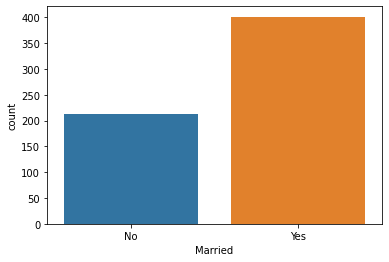

In [ ]:
sns.countplot(df['Married']);

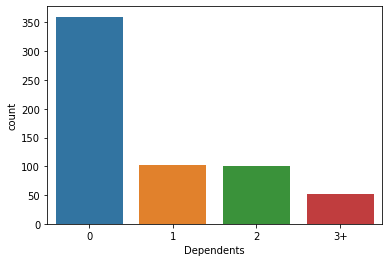

In [ ]:
sns.countplot(df['Dependents']);

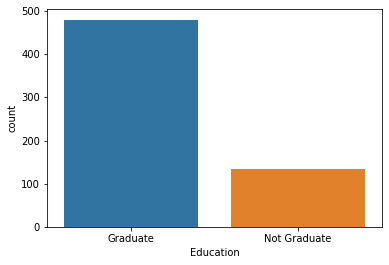

In [ ]:
sns.countplot(df['Education']);

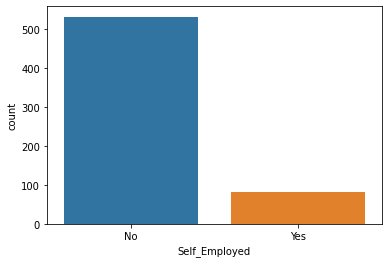

In [ ]:
sns.countplot(df['Self_Employed']);

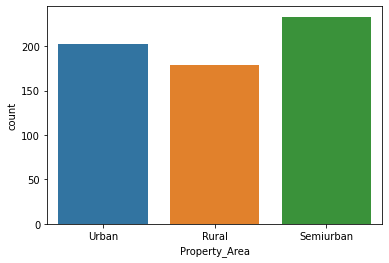

In [ ]:
sns.countplot(df['Property_Area']);

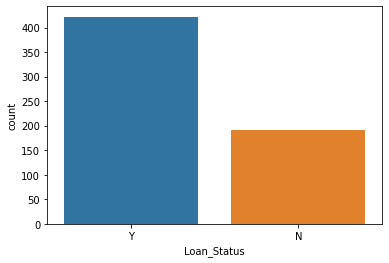

In [ ]:
sns.countplot(df['Loan_Status']);

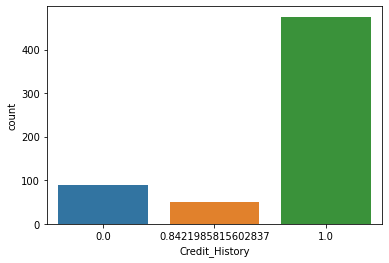

In [ ]:
sns.countplot(df['Credit_History']);

## **Univariate Analysis**
Univariate analysis is a standalone analysis of a variable or a column without considering any casual relationships with any other variable and obtaining some insights about the data. 
The following information has been obtained from the data graphs above. 

1. More loans are approved Vs rejected.
2. The number of male applicants is more than female applicants.
3. The number of married applicants is more than non-married.
4. The number of graduates is more than non-graduate.
5. The number of self-employed is less than that of non-self-employed applicants.
6. Maximum properties are located in semiurban areas.
7. Credit history is present for many applicants.
8. The count of applicants with several dependents = zero is maximum.


# **Data Visualization with Log Transformation of Numerical Features**

We see that the data is not uniformly distributed for the attributes “Applicant_Income”, “Coapplicant_Income”, “Loan_Amount” and “Loan_Amount_Term”. Hence, log transformation is applied to uniformly distribute the data. It’s primarily used to convert skewed distribution to normal distribution. We take the log values of the column and use these values as the column instead for further analysis. The below graph represents the log-transformed data on numerical attributes.


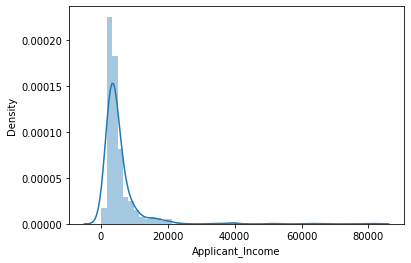

In [ ]:
# numerical attributes visualization
sns.distplot(df["Applicant_Income"]);

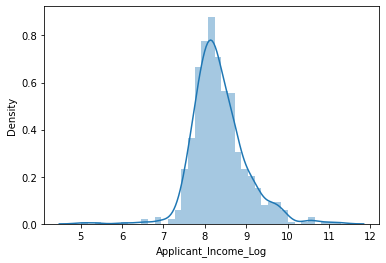

In [ ]:
# apply log transformation to the attribute
df['Applicant_Income_Log'] = np.log(df['Applicant_Income']+1)
sns.distplot(df["Applicant_Income_Log"]);

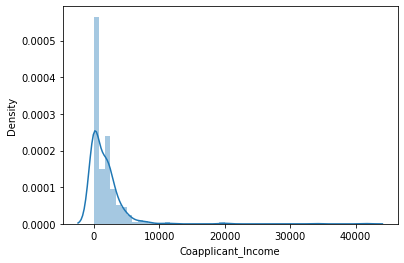

In [ ]:
sns.distplot(df["Coapplicant_Income"]);

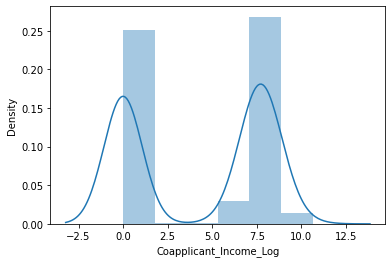

In [ ]:
#Log Transformation
df['Coapplicant_Income_Log'] = np.log(df['Coapplicant_Income']+1)
sns.distplot(df["Coapplicant_Income_Log"]);

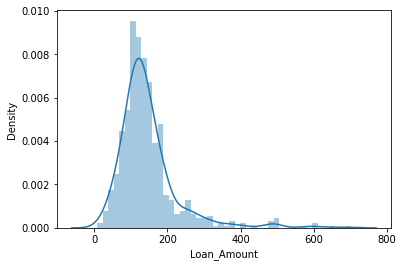

In [ ]:
sns.distplot(df["Loan_Amount"]);

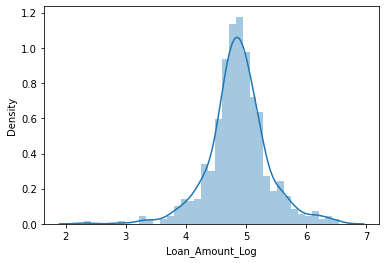

In [ ]:
#log transformation
df['Loan_Amount_Log'] = np.log(df['Loan_Amount']+1)
sns.distplot(df["Loan_Amount_Log"]);

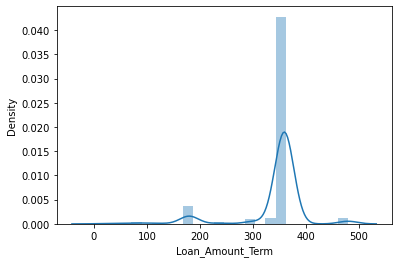

In [ ]:
sns.distplot(df['Loan_Amount_Term']);

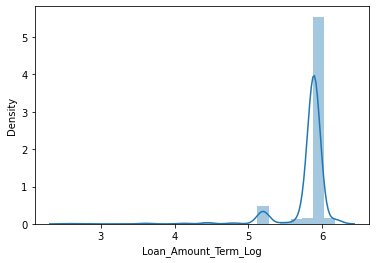

In [ ]:
#log transformation
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_Term_Log"]);

## **Bivariate Analysis**

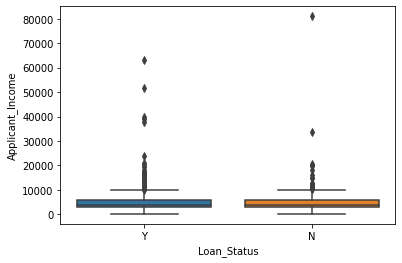

In [ ]:
sns.boxplot(x='Loan_Status', y='Applicant_Income', data=df);

The mean of Applicant_Income for yes and no are almost the same.

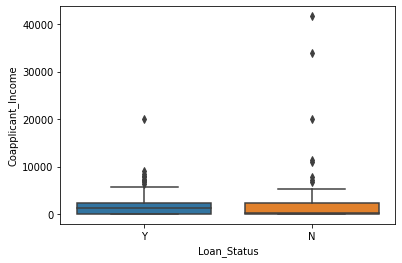

In [ ]:
sns.boxplot(x='Loan_Status', y='Coapplicant_Income', data=df);

The mean of Coapplicant_Income of yes is slightly higher than no.

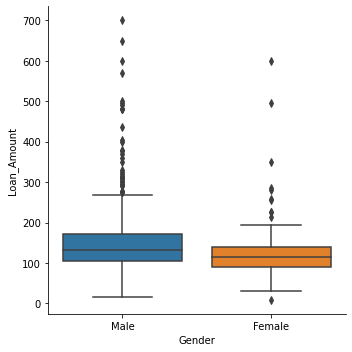

In [ ]:
sns.catplot(x='Gender', y='Loan_Amount', data=df, kind='box');

The mean value of Loan_Amount applied by males is slightly higher than females.


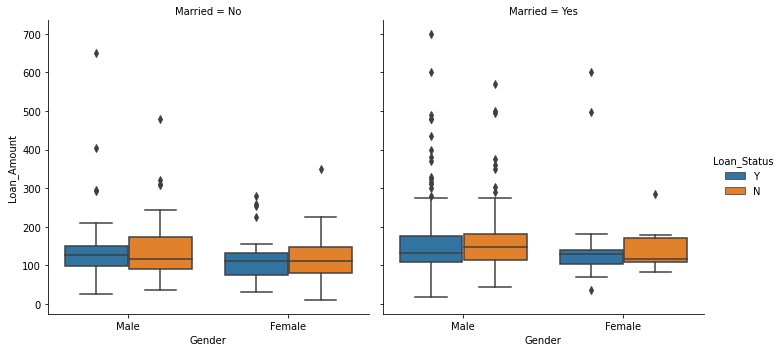

In [ ]:
sns.catplot(x='Gender', y='Loan_Amount', data=df, kind='box', hue='Loan_Status', col='Married');

Loan_Amount requested for married applicants is slightly higher than non-married applicants.


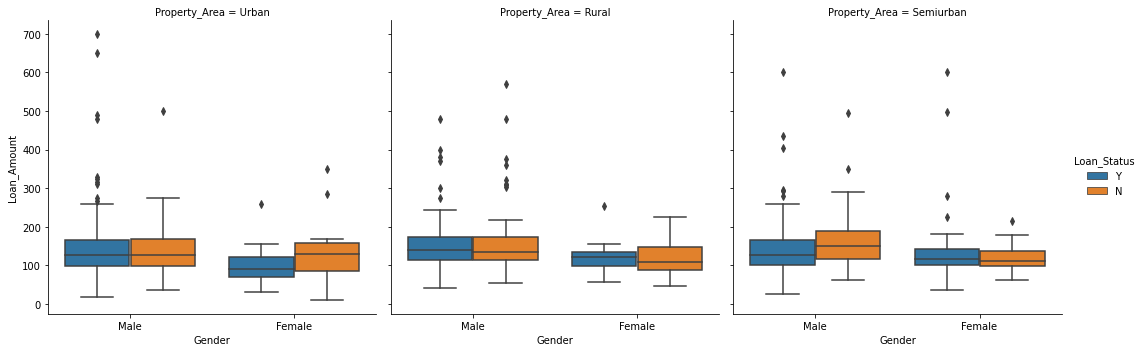

In [ ]:
sns.catplot(x='Gender', y='Loan_Amount', data=df, kind='box', hue='Loan_Status', col='Property_Area');

Male applicants have a higher requirement of loan amount than females in all three Property_Area.

# **Creation of New Attribute**

In [ ]:
# total income
df['Total_Income'] = df['Applicant_Income'] + df['Coapplicant_Income']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Applicant_Income_Log,Coapplicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674197,0.000000,4.993232,5.888878,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430327,7.319202,4.859812,5.888878,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006701,0.000000,4.204693,5.888878,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.857094,7.765993,4.795791,5.888878,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699681,0.000000,4.955827,5.888878,6000.0


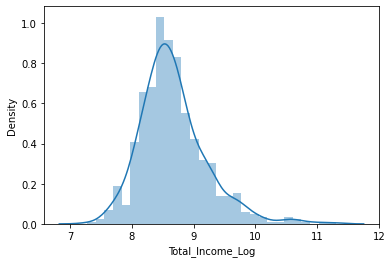

In [ ]:
#log transformation
df['Total_Income_Log'] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"]);


## **Correlation of all Columns**

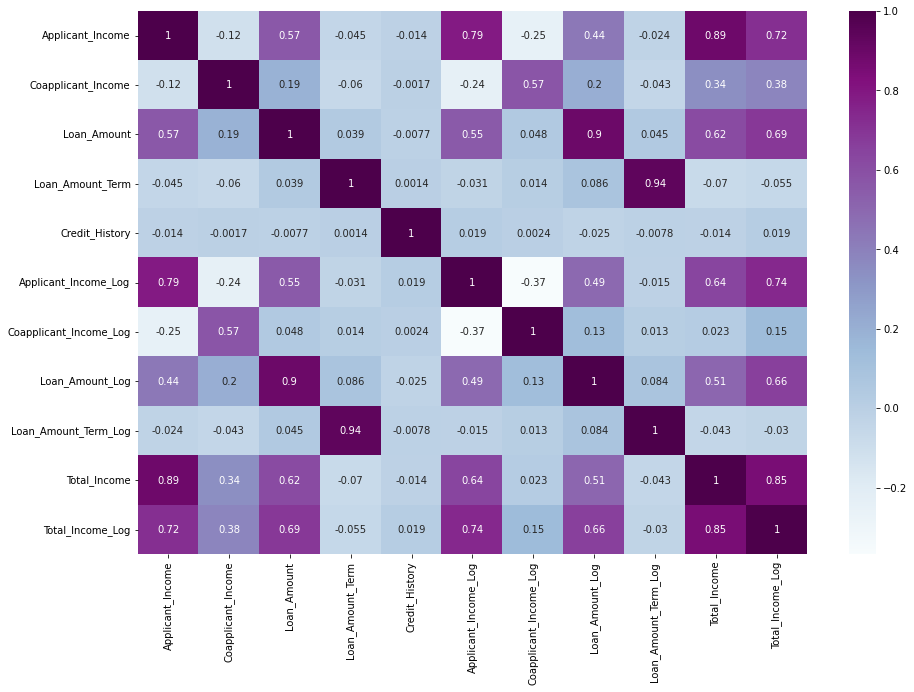

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Applicant_Income_Log,Coapplicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,8.674197,0.000000,4.993232,5.888878,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8.430327,7.319202,4.859812,5.888878,6091.0,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8.006701,0.000000,4.204693,5.888878,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,7.857094,7.765993,4.795791,5.888878,4941.0,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8.699681,0.000000,4.955827,5.888878,6000.0,8.699681


In [ ]:
# drop unnecessary columns
cols = ['Applicant_Income', 'Coapplicant_Income', "Loan_Amount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'Coapplicant_Income_Log']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.993232,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


## **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Applicant_Income_Log,Loan_Amount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


## **Handling Imbalanced Data**

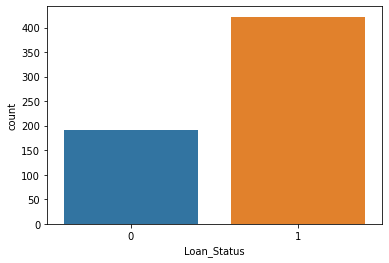

In [ ]:
sns.countplot(df['Loan_Status']);

In [ ]:
target = 'Loan_Status'

In [ ]:
X = df.loc[:, df.columns!=target]

In [ ]:
Y = df.loc[:, df.columns==target]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=42)

1    422
0    192
Name: Loan_Status, dtype: int64


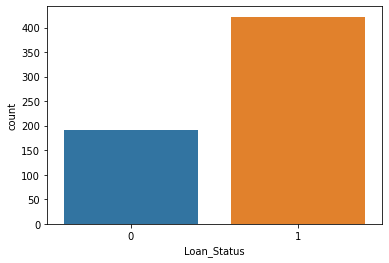

In [ ]:
ax = sns.countplot(x=target, data=df)
print(df[target].value_counts());

In [ ]:
100* (422/float(df.shape[0]))

68.72964169381108

In [ ]:
100* (192/float(df.shape[0]))

31.27035830618892

In [ ]:
Y_train[target].value_counts()

1    291
0    120
Name: Loan_Status, dtype: int64

In [ ]:
unique_classes = list(df[target].unique())
unique_classes

[1, 0]

In [ ]:
out_dict = {}
for classes in unique_classes:
    out_dict[classes] = df.shape[0]/((df.loc[df[target] == classes].shape[0])
                                     *len(unique_classes))

In [ ]:
out_dict

{0: 1.5989583333333333, 1: 0.7274881516587678}

In [ ]:
print (X_train.shape, Y_train.shape)

(411, 11) (411, 1)


In [ ]:
minority_class_len = len(df[df[target] == 1])
print(minority_class_len)

422


In [ ]:
majority_class_indices = df[df[target] == 0].index
print(majority_class_indices)

Int64Index([  1,   7,   9,  13,  17,  18,  20,  22,  23,  24,
            ...
            583, 584, 585, 589, 591, 596, 597, 600, 605, 613],
           dtype='int64', length=192)


In [ ]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=True)
print(len(random_majority_indices))

422


In [ ]:
minority_class_indices = df[df[target] == 1].index
print(minority_class_indices)

Int64Index([  0,   2,   3,   4,   5,   6,   8,  10,  11,  12,
            ...
            602, 603, 604, 606, 607, 608, 609, 610, 611, 612],
           dtype='int64', length=422)


In [ ]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [ ]:
under_sample = df.loc[under_sample_indices]

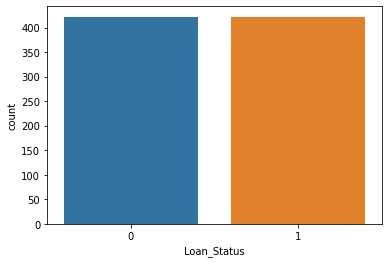

In [ ]:
sns.countplot(x=target, data=under_sample);

## **Train-Test Split**

In [ ]:
# specify input and output attributes
x = under_sample.drop(columns=['Loan_Status'], axis=1)
y = under_sample['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

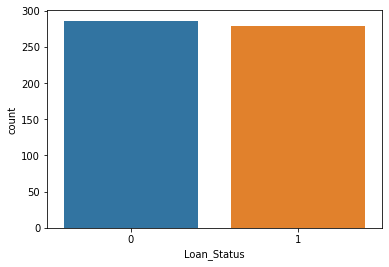

In [ ]:
sns.countplot(y_train);

## **Model Training**

In [ ]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy is 72.04301075268818
Cross validation is 70.49732318963089


In [ ]:
from sklearn import svm
from sklearn.svm import OneClassSVM
model = svm.SVC(kernel='linear')
classify(model, x, y)

Accuracy is 72.40143369175627
Cross validation is 70.61496196111581


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy is 83.15412186379928
Cross validation is 86.49619611158073


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy is 88.88888888888889
Cross validation is 90.28810932657085


## **Confusion Matrix**
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_train)
cm = confusion_matrix(y_train, y_pred)
cm

array([[148, 138],
       [ 27, 252]])

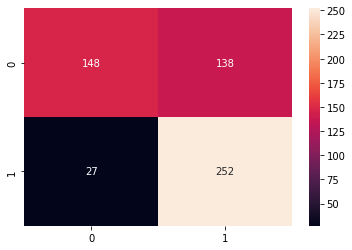

In [ ]:
sns.heatmap(cm, annot=True,fmt='g');

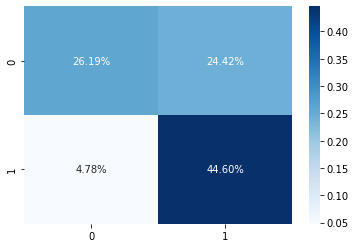

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');

In [ ]:
clf = LogisticRegression().fit(x_train, y_train)

In [ ]:
y_Test_Pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 67,  69],
       [  9, 134]])

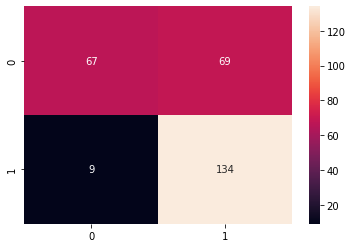

In [ ]:
sns.heatmap(cm, annot=True,fmt='g');

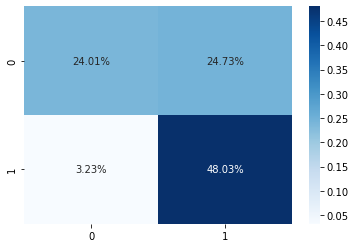

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');


In [ ]:
def generate_model_report(x_train, y_train):
    print("Accuracy = " , accuracy_score(y_train, y_test))
    print("Precision = " ,precision_score(y_train, y_test))
    print("Recall = " ,recall_score(y_train, y_test))
    print("F1 Score = " ,f1_score(y_train, y_test))
    pass

In [ ]:
generate_model_report(y_test, y_Test_Pred)

Accuracy =  0.7204301075268817
Precision =  0.9370629370629371
Recall =  0.6600985221674877
F1 Score =  0.7745664739884394
